In [1]:
%matplotlib inline
%load_ext line_profiler

In [2]:
%lprun?

Docstring:
Execute a statement under the line-by-line profiler from the
line_profiler module.

Usage:

    %lprun -f func1 -f func2 <statement>

The given statement (which doesn't require quote marks) is run via the
LineProfiler. Profiling is enabled for the functions specified by the -f
options. The statistics will be shown side-by-side with the code through the
pager once the statement has completed.

Options:

-f <function>: LineProfiler only profiles functions and methods it is told
to profile.  This option tells the profiler about these functions. Multiple
-f options may be used. The argument may be any expression that gives
a Python function or method object. However, one must be careful to avoid
spaces that may confuse the option parser.

-m <module>: Get all the functions/methods in a module

One or more -f or -m options are required to get any useful results.

-D <filename>: dump the raw statistics out to a pickle file on disk. The
usual extension for this is ".lprof". These s

In [3]:
import iris
import iris.quickplot as qplt
from iris.fileformats import netcdf as inc
from iris.coords import DimCoord, AuxCoord
from iris.cube import Cube
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import multiprocessing

print(multiprocessing.cpu_count())
use_joblib = True
# speed: serial > threading > loky
# backend = 'loky'
backend = "threading"
# inplace = True
inplace = False
n_jobs = 4

12


In [5]:
import cProfile
import pstats

In [6]:
import socket

print(socket.gethostname())

athena.noc.soton.ac.uk


In [7]:
from nonstationary_cov import (
    cube_covariance_nonstationary_stich as cube_cov_stich,
)

In [8]:
plt.rcParams["figure.figsize"] = [15, 10]

In [9]:
cube_matern_dist = iris.load("../test_data/Atlantic_Ocean_07.nc")
print(repr(cube_matern_dist))

[<iris 'Cube' of Lx / (km) (latitude: 120; longitude: 120)>,
<iris 'Cube' of Ly / (km) (latitude: 120; longitude: 120)>,
<iris 'Cube' of theta / (radians) (latitude: 120; longitude: 120)>,
<iris 'Cube' of qc_code / (1) (latitude: 120; longitude: 120)>,
<iris 'Cube' of number_of_iterations / (1) (latitude: 120; longitude: 120)>,
<iris 'Cube' of standard_deviation / (K) (latitude: 120; longitude: 120)>]


In [10]:
Lx = cube_matern_dist.extract("Lx")[0][50:70, 50:70]
Ly = cube_matern_dist.extract("Ly")[0][50:70, 50:70]
theta = cube_matern_dist.extract("theta")[0][50:70, 50:70]
sigma = cube_matern_dist.extract("standard_deviation")[0][50:70, 50:70]

In [11]:
print(repr(Lx))
print(repr(Ly))
print(repr(theta))
print(repr(sigma))

<iris 'Cube' of Lx / (km) (latitude: 20; longitude: 20)>
<iris 'Cube' of Ly / (km) (latitude: 20; longitude: 20)>
<iris 'Cube' of theta / (radians) (latitude: 20; longitude: 20)>
<iris 'Cube' of standard_deviation / (K) (latitude: 20; longitude: 20)>


In [12]:
print(Lx)
v = float(Lx.coord("v_shape").points)
delta_x_method = "Modified_Met_Office"
print(v)
print(delta_x_method)

Lx / (km)                              (latitude: 20; longitude: 20)
    Dimension coordinates:
        latitude                                x              -
        longitude                               -              x
    Scalar coordinates:
        fitting_model                  ps2006_kks2011_ani_r_pd
        month_number                   7
        supercategory_of_fitting_model 3_param_matern_pd
        time                           2002-07-03 00:00:00
        v_shape                        0.5
        year                           2002
    Attributes:
        Conventions                    'CF-1.7'
0.5
Modified_Met_Office


/tmp/ipykernel_3838701/1903522156.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v = float(Lx.coord('v_shape').points)


In [13]:
print(Lx.coord("latitude"))
print(Lx.coord("longitude"))

DimCoord :  latitude / (degrees)
    points: [-9.875, -8.875, ...,  8.125,  9.125]
    shape: (20,)
    dtype: float64
    standard_name: 'latitude'
    long_name: 'latitude'
    var_name: 'latitude'
DimCoord :  longitude / (degrees)
    points: [310.125, 311.125, ..., 328.125, 329.125]
    bounds: [
        [309.625, 310.625],
        [310.625, 311.625],
        ...,
        [327.625, 328.625],
        [328.625, 329.625]]
    shape: (20,)  bounds(20, 2)
    dtype: float64
    standard_name: 'longitude'
    long_name: 'longitude'
    var_name: 'longitude'


In [14]:
profiler = cProfile.Profile()
profiler.enable()
hfix_cpd = True
stich_hfix = cube_cov_stich.CovarianceCube_PreStichedLocalEstimates(
    Lx,
    Ly,
    theta,
    sigma,
    v=v,
    delta_x_method=delta_x_method,
    check_positive_definite=hfix_cpd,
    use_joblib=use_joblib,
    n_jobs=n_jobs,
    backend=backend,
    inplace=inplace,
)
profiler.disable()

Overhead processing start:  2025-01-23 15:06:02
Masked pixels detected in input files
Creating dummy arrays
Compressing (masked) array to 1D
Overhead processing ended:  2025-01-23 15:06:02
Time ellipsed:  0:00:00.062773
Covariance processing start:  2025-01-23 15:06:02
2025-01-23 15:06:02: Row 0/261; current & peak mem: 1.32305908203125 1.4106407165527344 MB; n_jobs = 4
2025-01-23 15:06:02: Row 1/261; current & peak mem: 1.4721508026123047 2.415353775024414 MB; n_jobs = 4
2025-01-23 15:06:03: Row 2/261; current & peak mem: 1.4874095916748047 2.415353775024414 MB; n_jobs = 4
2025-01-23 15:06:03: Row 3/261; current & peak mem: 1.4770221710205078 2.415353775024414 MB; n_jobs = 4
2025-01-23 15:06:03: Row 4/261; current & peak mem: 1.4756717681884766 2.415353775024414 MB; n_jobs = 4
2025-01-23 15:06:04: Row 5/261; current & peak mem: 1.4943418502807617 2.415353775024414 MB; n_jobs = 4
2025-01-23 15:06:04: Row 6/261; current & peak mem: 1.4877681732177734 2.415353775024414 MB; n_jobs = 4
202

In [15]:
def f2profile(Lx, Ly, theta, sigma):
    return cube_cov_stich.CovarianceCube_PreStichedLocalEstimates(
        Lx,
        Ly,
        theta,
        sigma,
        v=v,
        delta_x_method=delta_x_method,
        check_positive_definite=hfix_cpd,
        use_joblib=use_joblib,
        n_jobs=n_jobs,
        backend=backend,
        inplace=inplace,
    )


%lprun -f cube_cov_stich.CovarianceCube_PreStichedLocalEstimates f2profile(Lx, Ly, theta, sigma)

Overhead processing start:  2025-01-23 15:07:11
Masked pixels detected in input files
Creating dummy arrays
Compressing (masked) array to 1D
Overhead processing ended:  2025-01-23 15:07:11
Time ellipsed:  0:00:00.002069
Covariance processing start:  2025-01-23 15:07:11
2025-01-23 15:07:11: Row 0/261; current & peak mem: 3.2953405380249023 3.3059234619140625 MB; n_jobs = 4


/noc/users/stchan/py_env/anaconda-python3_3.11.3-GCCcore-12.3.0_gis_and_iris/lib/python3.11/site-packages/line_profiler/ipython_extension.py:97: UserWarning: Could not extract a code object for the object <class 'nonstationary_cov.cube_covariance_nonstationary_stich.CovarianceCube_PreStichedLocalEstimates'>
  profile = LineProfiler(*funcs)


2025-01-23 15:07:11: Row 1/261; current & peak mem: 3.3005475997924805 3.4082956314086914 MB; n_jobs = 4
2025-01-23 15:07:11: Row 2/261; current & peak mem: 3.2944679260253906 3.4082956314086914 MB; n_jobs = 4
2025-01-23 15:07:12: Row 3/261; current & peak mem: 3.307720184326172 3.4082956314086914 MB; n_jobs = 4
2025-01-23 15:07:12: Row 4/261; current & peak mem: 3.3134689331054688 3.4082956314086914 MB; n_jobs = 4
2025-01-23 15:07:12: Row 5/261; current & peak mem: 3.3224430084228516 3.4082956314086914 MB; n_jobs = 4
2025-01-23 15:07:13: Row 6/261; current & peak mem: 3.3156213760375977 3.4082956314086914 MB; n_jobs = 4
2025-01-23 15:07:13: Row 7/261; current & peak mem: 3.320803642272949 3.4082956314086914 MB; n_jobs = 4
2025-01-23 15:07:13: Row 8/261; current & peak mem: 3.3336668014526367 3.4082956314086914 MB; n_jobs = 4
2025-01-23 15:07:13: Row 9/261; current & peak mem: 3.339162826538086 3.4114608764648438 MB; n_jobs = 4
2025-01-23 15:07:14: Row 10/261; current & peak mem: 3.305

Timer unit: 1e-09 s

In [16]:
stats = pstats.Stats(profiler).sort_stats("tottime")
stats.print_stats(20)
stats = pstats.Stats(profiler).sort_stats("cumtime")
stats.print_stats(20)

         899070 function calls (896460 primitive calls) in 69.101 seconds

   Ordered by: internal time
   List reduced from 736 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    35108   66.491    0.002   66.491    0.002 {method 'acquire' of '_thread.lock' objects}
        1    0.422    0.422   69.101   69.101 /noc/users/stchan/code/AnisotropicSpatialSSTVariability/src/nonstationary_cov/cube_covariance_nonstationary_stich.py:560(__init__)
      262    0.356    0.001   66.128    0.252 /noc/software/rocky9/software/Python-bundle-PyPI/2023.06-GCCcore-12.3.0/lib/python3.11/site-packages/joblib/parallel.py:960(retrieve)
    36019    0.168    0.000   66.672    0.002 /noc/software/rocky9/software/Python/3.11.3-GCCcore-12.3.0/lib/python3.11/threading.py:604(wait)
        1    0.094    0.094    0.094    0.094 /noc/software/rocky9/software/SciPy-bundle/2023.07-gfbf-2023a/lib/python3.11/site-packages/numpy/linalg/linalg.py:2126(det)
     74

In [17]:
print(stich_hfix)

In [18]:
xy = 150
cor_with_point_cube0 = stich_hfix.remap_one_point_2_map(
    stich_hfix.cor_ns[xy, :].copy(), cube_name="correlation", cube_unit="1"
)

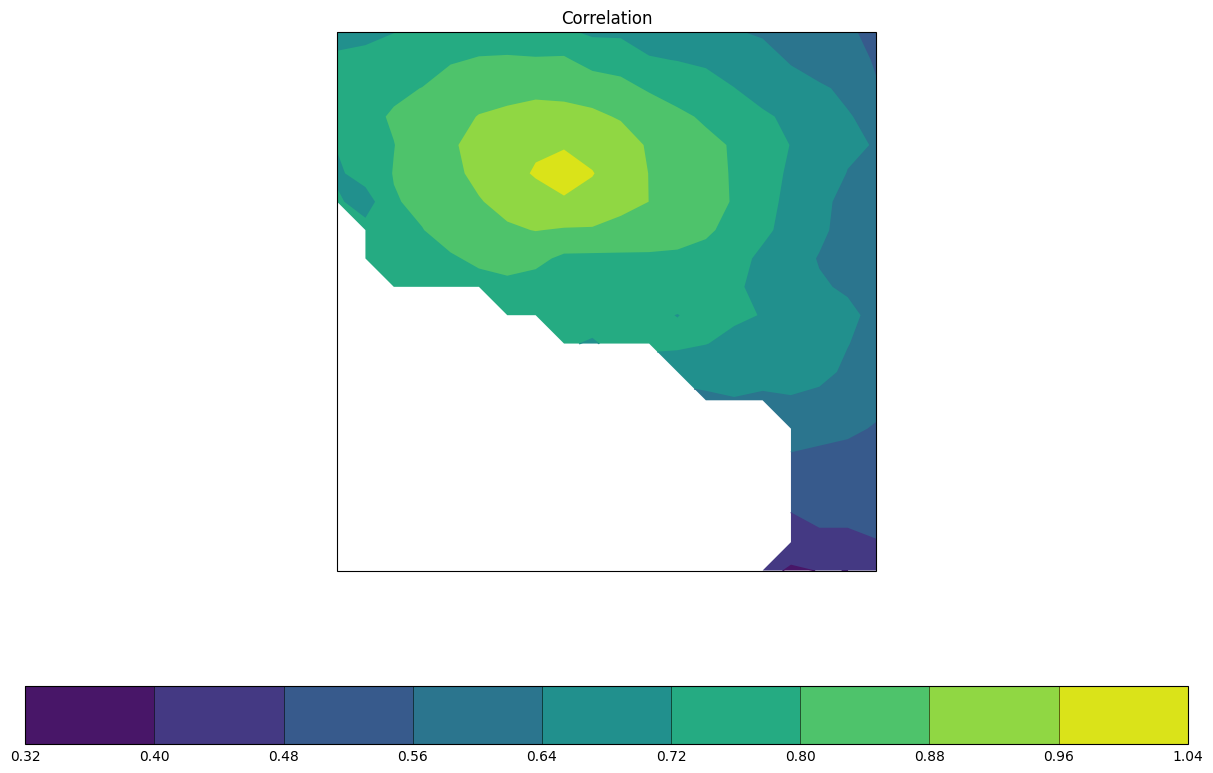

In [19]:
qplt.contourf(cor_with_point_cube0)

In [20]:
stich = stich_hfix
print(hfix_cpd)
print(stich.check_positive_definite)
print(int(stich.check_positive_definite))
covariance_file = "../test_hfix.nc"

True
True
1


In [21]:
stich_cov = stich.cov_ns
stich_cor = stich.cor_ns
# Create dummy row and column coordinates for covariance and correlation matrix
nrows = stich.cov_ns.shape[0]
dim_row = DimCoord(np.arange(nrows, dtype=int), long_name="dim_0", units="1")
dim_col = DimCoord(np.arange(nrows, dtype=int), long_name="dim_1", units="1")
# v_coord as an Aux Coord stating the Matern parameter
v_coord = AuxCoord(v, long_name="matern_nu")
det_coord = AuxCoord(stich.cov_det, long_name="covariance_determinant")
eig_coord = AuxCoord(stich.cov_eig[-1], long_name="smallest_eigenvalue")
pd_check_coord = AuxCoord(
    int(stich.check_positive_definite),
    long_name="positive_semidefinite_check_enabled",
)
# Define the iris cube
cov_cube = Cube(stich_cov, dim_coords_and_dims=[(dim_row, 0), (dim_col, 1)])
cor_cube = Cube(stich_cor, dim_coords_and_dims=[(dim_row, 0), (dim_col, 1)])
cov_cube.data = cov_cube.data.astype(np.float32)
cor_cube.data = cor_cube.data.astype(np.float32)
cov_cube.add_aux_coord(v_coord)
cor_cube.add_aux_coord(v_coord)
cov_cube.add_aux_coord(det_coord)
cor_cube.add_aux_coord(det_coord)
cov_cube.add_aux_coord(eig_coord)
cor_cube.add_aux_coord(eig_coord)
cov_cube.add_aux_coord(pd_check_coord)
cor_cube.add_aux_coord(pd_check_coord)
cov_cube.units = "K**2"
cor_cube.units = "1"
cov_cube.rename("covariance")
cor_cube.rename("correlation")

# Write to file
cov_list = iris.cube.CubeList()
cov_list.append(cov_cube)
cov_list.append(cor_cube)
print("Writing covariance file: ", covariance_file)
inc.save(cov_list, covariance_file)
##

Writing covariance file:  ../test_hfix.nc


/noc/users/stchan/py_env/anaconda-python3_3.11.3-GCCcore-12.3.0_gis_and_iris/lib/python3.11/site-packages/iris/fileformats/netcdf/saver.py:2670: IrisDeprecation: Saving to netcdf with legacy-style attribute handling for backwards compatibility.
This mode is deprecated since Iris 3.8, and will eventually be removed.
Please consider enabling the new split-attributes handling mode, by setting 'iris.FUTURE.save_split_attrs = True'.
  warn_deprecated(message)
